In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from models import AutoEncoder

In [2]:
test = pd.read_csv("../data/clean/test.csv")

In [3]:
test.columns

Index(['Unnamed: 0', 'AccPedal', 'AirIntakeTemperature', 'AmbientTemperature',
       'BoostPressure', 'BrkVoltage', 'ENG_Trq_DMD', 'ENG_Trq_ZWR',
       'ENG_Trq_m_ex', 'EngineSpeed_CAN', 'EngineTemperature', 'VehicleSpeed',
       'Engine_02_BZ', 'Engine_02_CHK'],
      dtype='object')

<AxesSubplot:>

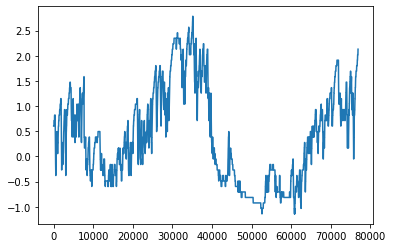

In [9]:
test["AirIntakeTemperature"].plot()

In [10]:
anomaly_frame = test.copy()

In [33]:
anomaly_frame["AirIntakeTemperature"].iloc[30_000:30_000 + 10_000] *= 2.5

<AxesSubplot:>

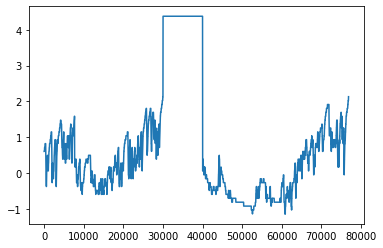

In [35]:
anomaly_frame["AirIntakeTemperature"].plot()

In [15]:
net = AutoEncoder([(13, 7), (7, 13)], nn.ELU)
net.load_state_dict(torch.load("../checkpoints/001/checkpoint.pt"))
net.eval()
net.requires_grad_(False)

AutoEncoder(
  (layers): ModuleList(
    (0): Linear(in_features=13, out_features=7, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=7, out_features=13, bias=True)
  )
)

In [36]:
columns = [
    "AccPedal", "AirIntakeTemperature", "AmbientTemperature",
    "BoostPressure", "BrkVoltage", "ENG_Trq_DMD", "ENG_Trq_ZWR", "ENG_Trq_m_ex", "EngineSpeed_CAN",
    "EngineTemperature", "VehicleSpeed", "Engine_02_BZ", "Engine_02_CHK"
]

test = test[columns]
anomaly_frame = anomaly_frame[columns]

In [37]:
mean = np.array([17.384136, 22.857227, 10.479726, 1.102523, 0.192781, 75.651505,
                             30.595131, 77.011757, 1874.961060, 95.081635, 63.488808, 7.506342, 133.359222])
std = np.array([20.480946, 6.875199, 1.778207, 0.144999, 0.394411, 71.301033,
                            29.650118, 66.098572, 702.622498, 3.029790, 46.076992, 4.323693, 68.061485])

In [38]:
p = net(torch.from_numpy((anomaly_frame.to_numpy() - mean)/std).float())
t = torch.from_numpy((anomaly_frame.to_numpy() - mean) / std)

loss = (p-t)**2
loss = loss.sum(axis=1)

In [39]:
predicted_intake = p[:, 1]
anomaly_intake = t[:, 1]

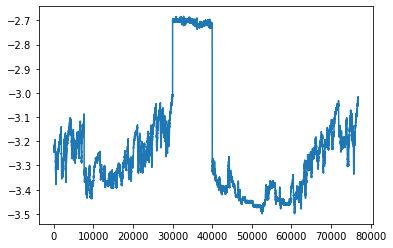

In [40]:
plt.plot(predicted_intake)

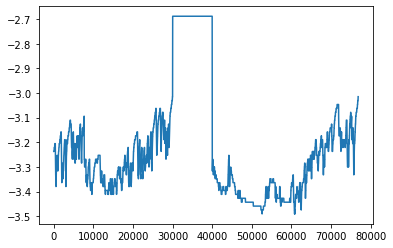

In [41]:
plt.plot(anomaly_intake)